In [54]:
import pandas as pd
csvFileName  = 'C:\\Users\\sathy\\Desktop\\ATiML_Project\\master996.csv'
data = pd.read_csv ( open ( csvFileName ), delimiter=';',encoding= 'unicode_escape')

#Extracting the bookid into Dataframe column FileNo, book id pg10067- FileNo - 10067
data['FileNo'] = data['book_id'].str.replace(r'\D+', '').astype(int)

#Sorting the books based on FileNo
data.sort_values(by=['FileNo'], inplace=True)

import glob

# Getting all files and its names into dict and then converting to dataframe"""
Content = {}

#Its placed in Books folder at local , need to change it later 
%timeit
files = glob.glob("C:\\Users\\sathy\\Desktop\\ATiML_Project\\Gutenberg_English_Fiction_1k\\Books\\*.html")
for f in files:
    with open(f,mode ='r', encoding = 'utf8') as myfile:
        Content[f]=myfile.read().replace("<br>", '\n')      

In [55]:
#Putting it in dataframe
df = pd.DataFrame.from_dict(Content,orient='index').reset_index()
#Renaming column names
df.columns = ['File_Name', 'Data']
#Adding FilNo column to join
df['FileNo'] = df['File_Name'].str.replace(r'\D+', '').astype(int)
df.sort_values(by=['FileNo'], inplace=True)
data['Book_Data'] = df.Data
data
books = pd.DataFrame({'Data':data.Book_Data[0:20], 'genre':data.guten_genre[0:20]})
books

,Data,genre
961,<p>It was Carnival time in the ancient and onc...,Literary
962,<p>A king\n<p>Upon whose property...\n<p>A dam...,Literary
995,<p>Edition: 10\n<p>This eBook was produced by ...,Literary
958,<p>Her Fancy and His Fact\n<p>The old by-road ...,Literary
959,<p>A solitary room at midnight: a single wax c...,Detective and Mystery
967,"<p>To Sir George Hamilton Seymour, G.C.H.\n<p>...",Literary
968,<p>It was a cold raw evening in February as I ...,Literary
969,<p>As there appeared to be but little prospect...,Literary
376,<p>The demand for Wee Wifie has led to a reiss...,Detective and Mystery
741,"<p>A Novel\n<p>A Novel.\n<p>Mrs. HENRY WOOD,\n...",Literary


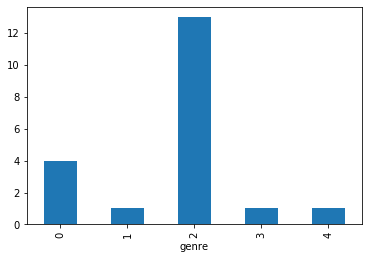

<Figure size 432x288 with 0 Axes>

In [71]:
# This is to see number of books per authors, but so many authors hence useless
#ax = sns.barplot(x = books['Author_Name'], y = books['FileNo'])

#Plotting number of authors per gerne
import matplotlib.pyplot as plt
books.groupby('genre')['Data'].count().plot(kind = 'bar')
plt.show()
plt.clf()

In [96]:
import re 
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords
import numpy as np
import pandas as pd

In [97]:
# This function converts a text to a sequence of words.
def content_wordlist(Data, remove_stopwords=False):
    # 1. Removing html tags
    review_text = BeautifulSoup(Data).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

In [98]:
import nltk.data
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [99]:
# This function splits a Data into sentences
def book_content(Data, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(Data.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(content_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences

In [100]:
sentences = []
print("Parsing sentences from training set")
for Data in books["Data"]:
    sentences += book_content(Data, tokenizer)

Parsing sentences from training set


In [101]:
# Importing the built-in logging module
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [102]:
# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model....")
model = word2vec.Word2Vec(sentences,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
model_name = "word2vec_Model"
model.save(model_name)

2020-05-26 11:19:07,360 : INFO : collecting all words and their counts
2020-05-26 11:19:07,366 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-05-26 11:19:07,441 : INFO : PROGRESS: at sentence #10000, processed 213206 words, keeping 10890 word types
2020-05-26 11:19:07,493 : INFO : PROGRESS: at sentence #20000, processed 373558 words, keeping 15071 word types


Training model....


2020-05-26 11:19:07,577 : INFO : PROGRESS: at sentence #30000, processed 623576 words, keeping 19982 word types
2020-05-26 11:19:07,643 : INFO : PROGRESS: at sentence #40000, processed 831356 words, keeping 22675 word types
2020-05-26 11:19:07,685 : INFO : PROGRESS: at sentence #50000, processed 997140 words, keeping 24820 word types
2020-05-26 11:19:07,732 : INFO : PROGRESS: at sentence #60000, processed 1158859 words, keeping 26249 word types
2020-05-26 11:19:07,786 : INFO : PROGRESS: at sentence #70000, processed 1323949 words, keeping 28028 word types
2020-05-26 11:19:07,838 : INFO : PROGRESS: at sentence #80000, processed 1460330 words, keeping 29121 word types
2020-05-26 11:19:07,897 : INFO : collected 31828 word types from a corpus of 1683977 raw words and 89541 sentences
2020-05-26 11:19:07,898 : INFO : Loading a fresh vocabulary
2020-05-26 11:19:07,928 : INFO : effective_min_count=40 retains 3215 unique words (10% of original 31828, drops 28613)
2020-05-26 11:19:07,929 : INFO 

In [103]:
# This will print the most similar words present in the model
model.wv.most_similar("man")

[('gentleman', 0.8170490264892578),
 ('fellow', 0.7655470371246338),
 ('merchant', 0.7195016145706177),
 ('woman', 0.7087341547012329),
 ('jolyon', 0.6422972083091736),
 ('fool', 0.6112238168716431),
 ('person', 0.6029847860336304),
 ('creature', 0.5664562582969666),
 ('lady', 0.560076117515564),
 ('artist', 0.5571185350418091)]

In [104]:
model.wv.most_similar("awful")

[('odd', 0.7660984992980957),
 ('adventure', 0.6948403120040894),
 ('immense', 0.677749514579773),
 ('unusual', 0.6552022695541382),
 ('unexpected', 0.6430626511573792),
 ('event', 0.6363199353218079),
 ('angel', 0.6167119741439819),
 ('instant', 0.6147767305374146),
 ('excellent', 0.6096200346946716),
 ('awkward', 0.5986032485961914)]

In [105]:
# This will give the total number of words in the vocabolary created from this dataset
model.wv.syn0.shape

C:\Users\sathy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


(3215, 300)

In [106]:
# Function to average all word vectors in a paragraph
def featureVecMethod(words, model, num_features):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
    
    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    return featureVec

In [107]:
def getAvgFeatureVecs(Data, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(books.Data),num_features),dtype="float32")
    for Data in books.Data:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Data %d of %d"%(counter,len(books.Data)))
            
        reviewFeatureVecs[counter] = featureVecMethod(Data, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [109]:
# Calculating average feature vector for training set
clean_train_reviews = []
for Data in books['Data']:
    clean_train_reviews.append(content_wordlist(Data, remove_stopwords=True))
    
trainDataVecs = getAvgFeatureVecs(clean_train_reviews, model, num_features)

Data 0 of 20


C:\Users\sathy\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


In [186]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(trainDataVecs, books.genre, test_size = .5) 

In [187]:
# Fitting a random forest classifier to the training data
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200)
    
print("Fitting random forest to training data....")    
forest = forest.fit(X_train, y_train)

Fitting random forest to training data....


In [188]:
result = forest.predict(X_test)

In [189]:
c_score = forest.fit(X_train, y_train).score(X_test,y_test) 
print("Score before any preprocessing is :"+str(c_score))

#show the confusin matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
print(classification_report(y_test, result)) 
cm = confusion_matrix(y_test, result) 
print(cm)

Score before any preprocessing is :0.7
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           2       0.86      0.86      0.86         7
           3       0.00      0.00      0.00         1

    accuracy                           0.70        10
   macro avg       0.40      0.45      0.42        10
weighted avg       0.67      0.70      0.68        10

[[1 1 0]
 [1 6 0]
 [1 0 0]]


C:\Users\sathy\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
